## Project 01: How  American Homicide Changed Over This Decade
 by Hafsa and Nicole

# How do murder rates in 2020 differ from 2010?
### *Did per capita homicide rates rise this decade? Is there a correlation between population size and murder rates? Below we will explore state crime statistics from the Federal Bureau of Investigation to answer these questions.*

In [60]:
# Dependencies and modules:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns
import statistics
import math
from scipy import stats

# Import API key
from api_keys import FBI_api

In [61]:
# Here we define a dictionary of state abbreviations that we can use to pull data for
# individual states from the FBI Crime Data Explorer API.

states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa',
          'AZ': 'Arizona','CA': 'California', 'CO': 'Colorado','CT': 'Connecticut',
          'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
          'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 
          'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts',
          'MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri',
          'MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NA': 
          'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 
          'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York',
          'OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico',
          'RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee',
          'TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont',
          'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}

In [91]:
# Here we have compiled the parts needed to build a URL for API calls:

# Base URL: api.usa.gov/crime/fbi/sapi/
# Endpoint: /api/estimates/states/               
# My api: FBI_api    

# We will now create a sample json output that we can use to identify formatting and nesting
# of each piece of data that we want to add to our dataframe

state_abbr = 'MO'   
base_url = "https://api.usa.gov/crime/fbi/sapi/api/estimates/states/"

req = requests.get(base_url + f'{state_abbr}/2010/2010?API_KEY={FBI_api}')
print(req)  # response 200!

json_data = req.json()
print(json_data)

<Response [200]>
{'results': [{'state_id': 28, 'state_abbr': 'MO', 'year': 2010, 'population': 5995715, 'violent_crime': 27440, 'homicide': 420, 'rape_legacy': 1445, 'rape_revised': None, 'robbery': 6185, 'aggravated_assault': 19390, 'property_crime': 200858, 'burglary': 44197, 'larceny': 140526, 'motor_vehicle_theft': 16135, 'arson': 1542}], 'pagination': {'count': 1, 'page': 0, 'pages': 1, 'per_page': 0}}


#### Now we will gather the desired data for our dataframes into two python dictionaries: one for 2010 and another for 2020. The data we want: state abbreviation, population, and number of homicides for 2010 and 2020. 

#### We will get that by making an empty set for each key value and appending it with a try/except call from the api.

# Hafsa! 
I figured out why this data was so limited. This code worked for Week 5 because it was 
getting one set of data per city. Here, we need sets of data per state abbrev for each year!
So we need to loop thru the API for each year... but I can't figure out how to do that.
So I will leave this cell here for you, and continue working on the data I got from using
two seperate calls. If you figure out how to make loops work, we can just slice that data 
to get the data I worked with for the analysis.
## Below I included some placeholder cells in case you wanted to try getting the looping call to work. :) 

In [105]:
#Placeholder in case you want to try the looping call:


# First, we will create a dictionary to store the desired data to pull from the API:

murder_by_state= {'State Abbreviation': [],
                  'Year': [],
                  'Population': [],
                  'Number of Homicides': []}

for state_abbr in states:
    base_url = "https://api.usa.gov/crime/fbi/sapi/api/estimates/states/"   
    
    while year < 2021:  # We need to loop thru the data again for every year 2010-2020. But I
        # dunno how!!! :'( 
        year += 1
        req = requests.get(base_url + f'{state_abbr}/2010/2020?API_KEY={FBI_api}')
        
        data = req.json()
        #print(data['results'][0])
        
        murder_by_state['State Abbreviation'].append(data['results'][0]['state_abbr'])
        murder_by_state['Year'].append(data['results'][0]['year'])
        murder_by_state['Population'].append(data['results'][0]['population'])
        murder_by_state['Number of Homicides'].append(data['results'][0]['homicide'])
        
        print("processing " + state_abbr)
 
    else:
        print(state_abbr+ " not found")                    
        pass

NameError: name 'year' is not defined

In [168]:
#Placeholder in case you want to try the looping call:

# Here we examine our dictionary to ensure it contains the data we are looking for.

murder_by_state

In [109]:
#Placeholder in case you want to try the looping call:

# Now we can create a dataframe with our collected data:

murders_by_state_df = pd.DataFrame(murder_by_state)

#But we are only interested in the years 2010 and 2020, so we will subset the data.
relevant_years = murders_by_state_df['Year'].isin(['2010', '2020'])
data_we_want = murders_by_state_df[relevant_years]

# But we also want to examine Per Capita Rates, so we will add a column for them.
# Per capita murder rate is equal to the number of homicides divided by the population.

data_we_want['Per Capita Rate'] = data_we_want['Number of Homicides'] / data_we_want['Population']

#Then we can organize the data from 2010 and 2020 with .groupby()
state_murders_df = data_we_want.set_index('Year')

state_murders_df

,State Abbreviation,Population,Number of Homicides,Per Capita Rate
Year,,,,


# Hafsa, here is where the work starts for seperate calls

In [85]:
# First, we will create a dictionary for 2010:

murder_by_state_2010= {'State Abbreviation': [], 
                       'Year': [], 
                       'Population': [], 
                       'Number of Homicides': []}

for state_abbr in states:
    base_url = "https://api.usa.gov/crime/fbi/sapi/api/estimates/states/"   #how to add the state abbr in here?
    
    try:
        
        req = requests.get(base_url + f'{state_abbr}/2010/2010?API_KEY={FBI_api}')
        
        data = req.json()
        #print(data['results'][0])
        
        murder_by_state_2010['State Abbreviation'].append(data['results'][0]['state_abbr'])
        murder_by_state_2010['Year'].append(data['results'][0]['year'])
        murder_by_state_2010['Population'].append(data['results'][0]['population'])
        murder_by_state_2010['Number of Homicides'].append(data['results'][0]['homicide'])
        
        print("processing " + state_abbr)
 
    except:
        print(state_abbr+ " not found")                    
        pass

processing AK
processing AL
processing AR
AS not found
processing AZ
processing CA
processing CO
processing CT
processing DC
processing DE
processing FL
processing GA
GU not found
processing HI
processing IA
processing ID
processing IL
processing IN
processing KS
processing KY
processing LA
processing MA
processing MD
processing ME
processing MI
processing MN
processing MO
MP not found
processing MS
processing MT
NA not found
processing NC
processing ND
processing NE
processing NH
processing NJ
processing NM
processing NV
processing NY
processing OH
processing OK
processing OR
processing PA
PR not found
processing RI
processing SC
processing SD
processing TN
processing TX
processing UT
processing VA
VI not found
processing VT
processing WA
processing WI
processing WV
processing WY


In [86]:
# Here we repeat the call for 2020:

murder_by_state_2020 = {'State Abbreviation': [], 
                        'Year': [],
                        'Population': [],
                        'Number of Homicides': []}

for state_abbr in states:
    base_url = "https://api.usa.gov/crime/fbi/sapi/api/estimates/states/"   
    
    try:
        
        req = requests.get(base_url + f'{state_abbr}/2020/2020?API_KEY={FBI_api}')
        
        data = req.json()
                
        murder_by_state_2020['State Abbreviation'].append(data['results'][0]['state_abbr'])
        murder_by_state_2020['Year'].append(data['results'][0]['year'])
        murder_by_state_2020['Population'].append(data['results'][0]['population'])
        murder_by_state_2020['Number of Homicides'].append(data['results'][0]['homicide'])
         
        print("processing " + state_abbr)
        
    except:
        print(state_abbr+ " not found")                    
        pass

processing AK
processing AL
processing AR
AS not found
processing AZ
processing CA
processing CO
processing CT
processing DC
processing DE
processing FL
processing GA
GU not found
processing HI
processing IA
processing ID
processing IL
processing IN
processing KS
processing KY
processing LA
processing MA
processing MD
processing ME
processing MI
processing MN
processing MO
MP not found
processing MS
processing MT
NA not found
processing NC
processing ND
processing NE
processing NH
processing NJ
processing NM
processing NV
processing NY
processing OH
processing OK
processing OR
processing PA
PR not found
processing RI
processing SC
processing SD
processing TN
processing TX
processing UT
processing VA
VI not found
processing VT
processing WA
processing WI
processing WV
processing WY


In [87]:
# Here we examine our dictionary to ensure it contains the data we are looking for.

murder_by_state_2010

{'State Abbreviation': ['AK',
  'AL',
  'AR',
  'AZ',
  'CA',
  'CO',
  'CT',
  'DC',
  'DE',
  'FL',
  'GA',
  'HI',
  'IA',
  'ID',
  'IL',
  'IN',
  'KS',
  'KY',
  'LA',
  'MA',
  'MD',
  'ME',
  'MI',
  'MN',
  'MO',
  'MS',
  'MT',
  'NC',
  'ND',
  'NE',
  'NH',
  'NJ',
  'NM',
  'NV',
  'NY',
  'OH',
  'OK',
  'OR',
  'PA',
  'RI',
  'SC',
  'SD',
  'TN',
  'TX',
  'UT',
  'VA',
  'VT',
  'WA',
  'WI',
  'WV',
  'WY'],
 'Year': [2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010,
  2010],
 'Population': [714146,
  4785401,
  2921588,
  6413158,
  37338198,
  5047692,
  3575498,
  604912,
  899792,
  18838613,
  9712157,
  1363359,
  30502

In [88]:
# Repeat for the 2020 dictionary.
murder_by_state_2020

{'State Abbreviation': ['AK',
  'AL',
  'AR',
  'AZ',
  'CA',
  'CO',
  'CT',
  'DC',
  'DE',
  'FL',
  'GA',
  'HI',
  'IA',
  'ID',
  'IL',
  'IN',
  'KS',
  'KY',
  'LA',
  'MA',
  'MD',
  'ME',
  'MI',
  'MN',
  'MO',
  'MS',
  'MT',
  'NC',
  'ND',
  'NE',
  'NH',
  'NJ',
  'NM',
  'NV',
  'NY',
  'OH',
  'OK',
  'OR',
  'PA',
  'RI',
  'SC',
  'SD',
  'TN',
  'TX',
  'UT',
  'VA',
  'VT',
  'WA',
  'WI',
  'WV',
  'WY'],
 'Year': [2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020,
  2020],
 'Population': [731158,
  4921532,
  3030522,
  7421401,
  39368078,
  5807719,
  3557006,
  712816,
  986809,
  21733312,
  10710017,
  1407006,
  3163

In [167]:
# Now we can create a dataframe in order to efficiently work with our collected data.

state_murders_2010 = pd.DataFrame(murder_by_state_2010)
# This worked as expected.

#Now we want to add a column for per capita murder rates. Per capita murder rate is equal to 
# the number of homicides divided by the population.The dataframe would also look better if
#the Year was made the index.

state_murders_2010['Per Capita Rate'] = state_murders_2010['Number of Homicides'] / state_murders_2010['Population']
state_murders_2010.set_index('Year')

# Repeat for 2020
state_murders_2020 = pd.DataFrame(murder_by_state_2020)

state_murders_2020['Per Capita Rate'] = state_murders_2020['Number of Homicides'] / state_murders_2020['Population']
state_murders_2020.set_index('Year')

# Join the dataframes

state_murders_df = pd.concat([state_murders_2010, state_murders_2020],ignore_index=True)
state_murders_df.sort_values(by='State Abbreviation',axis=0, ascending=True, inplace=False, kind='quicksort',)


,State Abbreviation,Year,Population,Number of Homicides,Per Capita Rate
0,AK,2010,714146,31,0.000043
51,AK,2020,731158,49,0.000067
1,AL,2010,4785401,275,0.000057
52,AL,2020,4921532,471,0.000096
2,AR,2010,2921588,134,0.000046
...,...,...,...,...,...
48,WI,2010,5691659,155,0.000027
100,WV,2020,1784787,117,0.000066
49,WV,2010,1854368,58,0.000031
50,WY,2010,564554,8,0.000014


## Now that we have collected and organized the data we want, we can analyze and visualize it.

## National Homicide Per Capita

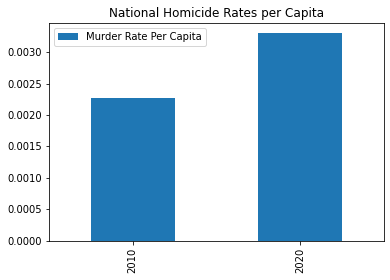

In [139]:
#Here we will sum the values from each year of all states' per capita homicide rates 
# into one national value and then visualize that value with a bold bar chart.

National_Per_Capita_Rate_2010 = state_murders_2010['Per Capita Rate'].sum()
National_Per_Capita_Rate_2020 = state_murders_2020['Per Capita Rate'].sum()
National_per_capita = pd.DataFrame([National_Per_Capita_Rate_2010, National_Per_Capita_Rate_2020])
National_per_capita.index = (['2010','2020'])
National_per_capita.columns = (['Murder Rate Per Capita'])

National_per_capita.plot(kind='bar', title = 'National Homicide Rates per Capita')
plt.show()

## State Homicide Per Capita

C:\Users\Nik\AppData\Local\Temp/ipykernel_12640/2400417028.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(state_per_capita.index, rotate= 90)


AttributeError: 'Text' object has no property 'rotate'

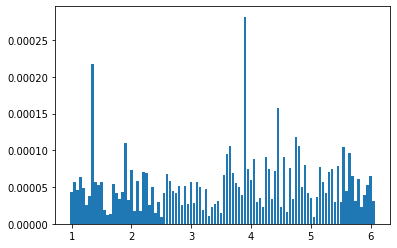

In [170]:
# This is wrong. I need to set it up where the Years are two separate bar plots laid over
# each other OR in two subplots. I gotta fix!

state_per_capita = state_murders_df[['Year', 'State Abbreviation', 'Per Capita Rate']]
#state_per_capita.set_index('State Abbreviation')
fig, ax = plt.subplots()

# Plot a bar-chart of homicide rates per capita as a function of state
ax.bar(state_per_capita.index, state_per_capita['Per Capita Rate'])

# Set the x-axis tick labels
ax.set_xticklabels(state_per_capita.index, rotate= 90)

# Set the y-axis label
ax.set_ylabel("Homicide Rate per Capita")

plt.show()

# Murder Rates per Population Size

Here I would like to add a Seaborn Scatter Plot with a hue as a third variable: Year. 

# Total Number of Murders: 2010 vs. 2020

Here I would like to add two semi-transparent histograms of murders by state, one of 2010 and one of 2020.

# Conclusions

Here we can answer our questions and prove/disprove our hypotheses.

# Hey, Hafsa!
So, I didn't quite finish all the visualizations that I wanted to. Obviously. And the ones I *did* make are rough and need some polish. I will work on them some more today. If you *think* you can make a loop API call work, great. If not, don't worry about it: we have the data that we need. One last thing: Alexis mentioned that she wanted us to use...uh, whatever stats we learned from last class in this project. I couldn't remember them and ran out of time to go back thru the video from last week. I will address that today, as well, unless you beat me to it. Don't feel like you have to do anything else with this. I feel like you did your part just getting the API call to work!!! <3, Nicole